In [1]:
#from mpmath import *
from sympy import *
from sympy.matrices import Matrix
import numpy as np

In [2]:
def rot_x(q):
    '''Creates rotation matrix about X-axis'''
    R_x = Matrix([[ 1,              0,        0],
                  [ 0,        cos(q),   -sin(q)],
                  [ 0,        sin(q),    cos(q)]])
    return R_x
    
def rot_y(q):              
    '''Creates rotation matrix about Y-axis'''
    R_y = Matrix([[ cos(q),        0,   sin(q)],
                  [      0,        1,        0],
                  [-sin(q),        0,   cos(q)]])
    return R_y

def rot_z(q):    
    '''Creates rotation matrix about Z-axis'''
    R_z = Matrix([[ cos(q), -sin(q),        0],
                  [ sin(q),  cos(q),        0],
                  [      0,       0,        1]])
    return R_z

def homogeneous_rot_x(q):
    '''Creates homogeneous rotation matrix about X-axis'''
    R_x = rot_x(q).row_join(Matrix([[0], [0], [0]])).col_join(Matrix([[0, 0, 0, 1]]))
    return R_x
    
def homogeneous_rot_y(q):              
    '''Creates homogeneous rotation matrix about Y-axis'''
    R_y = rot_y(q).row_join(Matrix([[0], [0], [0]])).col_join(Matrix([[0, 0, 0, 1]]))
    return R_y

def homogeneous_rot_z(q):    
    '''Creates homogeneous rotation matrix about Z-axis'''
    R_z = rot_z(q).row_join(Matrix([[0], [0], [0]])).col_join(Matrix([[0, 0, 0, 1]]))
    return R_z

def create_DH_trf_matrix(alpha, a, d , q):
    '''Define Modified DH Transformation matrix'''
    T = Matrix([[             cos(q),            -sin(q),            0,              a],
               [ sin(q)*cos(alpha), cos(q)*cos(alpha), -sin(alpha), -sin(alpha)*d],
               [ sin(q)*sin(alpha), cos(q)*sin(alpha),  cos(alpha),  cos(alpha)*d],
               [                   0,                   0,            0,               1]])
    return T

def get_rot_from_homogeneous(M):
    '''Extracts the rotation matrix from the homogeneous transformation matrix'''
    return M[:3,:3]

In [3]:
### Create symbols for joint variables
q1, q2, q3, q4, q5, q6 = symbols('q1:7')
d1, d2, d3, d4, d5, d6 = symbols('d1:7')
a0, a1, a2, a3, a4, a5 = symbols('a0:6')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5 = symbols('alpha0:6')
qG, dG, aG, alphaG = symbols('qG dG aG alphaG')

# Create Modified DH parameters
dh_params = {
        alpha0:0,     a0:0,      d1:0.75,
        alpha1:-pi/2, a1:0.35,   d2:0,      q2:q2-pi/2,
        alpha2:0,     a2:1.25,   d3:0,
        alpha3:-pi/2, a3:-0.054, d4:1.5,
        alpha4:pi/2,  a4:0,      d5:0,
        alpha5:-pi/2, a5:0,      d6:0,
        alphaG:0,     aG:0,      dG:0.303,  qG:0,
    }

# Create individual transformation matrices
T0_1 = create_DH_trf_matrix(alpha0, a0, d1, q1)
T0_1 = T0_1.subs(dh_params)
T1_2 = create_DH_trf_matrix(alpha1, a1, d2, q2)
T1_2 = T1_2.subs(dh_params)
T2_3 = create_DH_trf_matrix(alpha2, a2, d3, q3)
T2_3 = T2_3.subs(dh_params)
T3_4 = create_DH_trf_matrix(alpha3, a3, d4, q4)
T3_4 = T3_4.subs(dh_params)
T4_5 = create_DH_trf_matrix(alpha4, a4, d5, q5)
T4_5 = T4_5.subs(dh_params)
T5_6 = create_DH_trf_matrix(alpha5, a5, d6, q6)
T5_6 = T5_6.subs(dh_params)
T6_G = create_DH_trf_matrix(alphaG, aG, dG, qG)
T6_G = T6_G.subs(dh_params)

In [4]:
# Rotation matrices (extracted from Transformation matrices)
R0_1 = get_rot_from_homogeneous(T0_1)
R1_2 = get_rot_from_homogeneous(T1_2)
R2_3 = get_rot_from_homogeneous(T2_3)
R3_4 = get_rot_from_homogeneous(T3_4)
R4_5 = get_rot_from_homogeneous(T4_5)
R5_6 = get_rot_from_homogeneous(T5_6)
R6_G = get_rot_from_homogeneous(T6_G)

In [32]:
# Composition of Transformation matrices - Incrementally from base to end effector frame
T0_2 = T0_1 * T1_2
T0_3 = T0_2 * T2_3
T0_4 = T0_3 * T3_4
T0_5 = T0_4 * T4_5
T0_6 = T0_5 * T5_6
T0_G = T0_6 * T6_G

# Correction matrix for the end effector frame
pprint(homogeneous_rot_z(np.pi))
R_corr = homogeneous_rot_z(np.pi) * homogeneous_rot_y(-np.pi/2)
# Total homogeneous transform between base link and end effector with correction
T_total = T0_G * R_corr

⎡        -1.0          -1.22464679914735e-16  0  0⎤
⎢                                                 ⎥
⎢1.22464679914735e-16          -1.0           0  0⎥
⎢                                                 ⎥
⎢         0                      0            1  0⎥
⎢                                                 ⎥
⎣         0                      0            0  1⎦


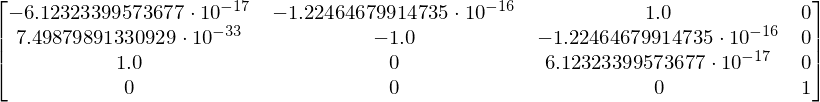

In [34]:
#init_printing()
#R_corr

In [6]:
test_angles = {q1:0, q2:0, q3:0, q4:0, q5:0, q6:0}
print("T0_1 : ", T0_1.evalf(subs=test_angles))
print("T0_2 : ", T0_2.evalf(subs=test_angles))
print("T0_3 : ", T0_3.evalf(subs=test_angles))
print("T0_4 : ", T0_4.evalf(subs=test_angles))
print("T0_5 : ", T0_5.evalf(subs=test_angles))
print("T0_6 : ", T0_6.evalf(subs=test_angles))
print("T0_G : ", T0_G.evalf(subs=test_angles))
print("T_total : ", T_total.evalf(subs=test_angles))

('T0_1 : ', Matrix([
[1.0,   0,   0,    0],
[  0, 1.0,   0,    0],
[  0,   0, 1.0, 0.75],
[  0,   0,   0,  1.0]]))
('T0_2 : ', Matrix([
[  0, 1.0,   0, 0.35],
[  0,   0, 1.0,    0],
[1.0,   0,   0, 0.75],
[  0,   0,   0,  1.0]]))
('T0_3 : ', Matrix([
[  0, 1.0,   0, 0.35],
[  0,   0, 1.0,    0],
[1.0,   0,   0,  2.0],
[  0,   0,   0,  1.0]]))
('T0_4 : ', Matrix([
[  0,    0, 1.0,  1.85],
[  0, -1.0,   0,     0],
[1.0,    0,   0, 1.946],
[  0,    0,   0,   1.0]]))
('T0_5 : ', Matrix([
[  0, 1.0,   0,  1.85],
[  0,   0, 1.0,     0],
[1.0,   0,   0, 1.946],
[  0,   0,   0,   1.0]]))
('T0_6 : ', Matrix([
[  0,    0, 1.0,  1.85],
[  0, -1.0,   0,     0],
[1.0,    0,   0, 1.946],
[  0,    0,   0,   1.0]]))
('T0_G : ', Matrix([
[  0,    0, 1.0, 2.153],
[  0, -1.0,   0,     0],
[1.0,    0,   0, 1.946],
[  0,    0,   0,   1.0]]))
('T_total : ', Matrix([
[                  1.0,                     0, 6.12323399573677e-17, 2.153],
[-7.49879891330929e-33,                   1.0, 1.22464679914735e-1

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

with open('error_points.txt', 'r') as f:
    content = f.read().split(' ')

data = []
for l in content:
    l = l.strip()
    if l == '\n' or l == '':
        continue
    data.append(float(l));

plt.xlabel('Distribution of the error in end-effector poses', fontsize=10)
ax = sns.distplot(data);